In [1]:
from pynq import Overlay
from pynq import MMIO

In [2]:
ol = Overlay("../fobos_ctrl.bit")

In [3]:
ol.ip_dict

{'axi_dma_0': {'addr_range': 65536,
  'device': <pynq.pl_server.device.XlnkDevice at 0xb3aa0870>,
  'driver': pynq.lib.dma.DMA,
  'fullpath': 'axi_dma_0',
  'gpio': {},
  'interrupts': {'mm2s_introut': {'controller': 'axi_intc_0',
    'fullpath': 'axi_dma_0/mm2s_introut',
    'index': 0},
   's2mm_introut': {'controller': 'axi_intc_0',
    'fullpath': 'axi_dma_0/s2mm_introut',
    'index': 1}},
  'mem_id': 'S_AXI_LITE',
  'parameters': {'C_BASEADDR': '0x40400000',
   'C_DLYTMR_RESOLUTION': '125',
   'C_ENABLE_MULTI_CHANNEL': '0',
   'C_FAMILY': 'zynq',
   'C_HIGHADDR': '0x4040FFFF',
   'C_INCLUDE_MM2S': '1',
   'C_INCLUDE_MM2S_DRE': '0',
   'C_INCLUDE_MM2S_SF': '1',
   'C_INCLUDE_S2MM': '1',
   'C_INCLUDE_S2MM_DRE': '0',
   'C_INCLUDE_S2MM_SF': '1',
   'C_INCLUDE_SG': '0',
   'C_INCREASE_THROUGHPUT': '0',
   'C_MICRO_DMA': '0',
   'C_MM2S_BURST_SIZE': '16',
   'C_M_AXIS_MM2S_CNTRL_TDATA_WIDTH': '32',
   'C_M_AXIS_MM2S_TDATA_WIDTH': '32',
   'C_M_AXI_MM2S_ADDR_WIDTH': '32',
   'C_M_AXI_

In [4]:
power_addr = ol.ip_dict["powermanager_0"]["phys_addr"]

In [5]:
power_addr_range = ol.ip_dict["powermanager_0"]["addr_range"]

In [6]:
power = MMIO(power_addr, power_addr_range)

In [7]:
power.device

In [8]:
# Registers Shield rev 2
power_command       = 0x00
power_status        = 0x04
power_volt3v3       = 0x08
power_current3v3    = 0x0C
power_volt5v        = 0x10
power_current5v     = 0x14
power_voltvar       = 0x18
power_currentvar    = 0x1C
power_avgvolt3v3    = 0x20
power_avgcurrent3v3 = 0x24
power_avgvolt5v     = 0x28
power_avgcurrent5v  = 0x2C
power_avgvoltvar    = 0x30
power_avgcurrentvar = 0x34
power_maxvolt3v3    = 0x38
power_maxcurrent3v3 = 0x3C
power_maxvolt5v     = 0x40
power_maxcurrent5v  = 0x44
power_maxvoltvar    = 0x48
power_maxcurrentvar = 0x4C
power_volt_output   = 0x50
power_sampelcount   = 0x54

# Commands
power_out_enable    = 0x01
power_clear         = 0x02
power_gain3v3cur    = 0x04
power_gain5vcur     = 0x10
power_gainvarcur    = 0x40
power_trigenhw      = 0x100
power_trigsw        = 0x200

# Status
power_out_good      = 0x000
power_busy          = 0x002
#power_gain3v3cur    = 0x04
#power_gain5vcur     = 0x10
#power_gainvarcur    = 0x40
power_triggdhw      = 0x100
power_triggdsw      = 0x200
power_oflowsw       = 0x400


# Measurement Parameters
xadc_resolution = 65535  # 2^16 -1
xadc_max = 5 # Volt
xbp_shunt = 0.1 # Ohm, should be 0.1
xbp_gain = 25 # at least 25

def power_volt(register):
    return (xadc_max/xadc_resolution * power.read(register))
def power_current(register):
    return ( xadc_max/xadc_resolution * power.read(register) / (xbp_shunt * xbp_gain))





### Clear registers

In [9]:
power.write(power_command, power_clear)
power.write(power_command,0x00)
power.read(power_status)

0

### Read Actual Voltages and Currents

In [10]:
power_volt(power_volt3v3)

3.129777981231403

In [11]:
power_volt(power_volt5v)

4.864271000228885

In [38]:
power_volt(power_voltvar)

0.018616006713969634

In [13]:
power_current(power_current3v3)

0.00784313725490196

In [14]:
power_current(power_current5v)

0.007812619211108568

In [15]:
power_current(power_currentvar)

0.004333562218661784

### Enable Var Power

In [22]:
power.write(power_command, power_out_enable)
power.write(power_volt_output, 0x20)
power.read(power_volt_output)

32

In [23]:
power_volt(power_voltvar)

2.0442958518348977

In [24]:
power_current(power_currentvar)

0.000848401617456321

In [25]:
power.write(power_command, power_clear)

### Average and Maximum Voltages
click quickly

In [267]:
power.write(power_command, power_clear)
power.write(power_command, 0x00)

In [268]:
power.write(power_command, power_trigsw | power_out_enable)
power.write(power_volt_output, 0x35)

In [269]:
power.write(power_command,0x00)

In [270]:
power_volt(power_avgvolt3v3)

3.1290913252460517

In [271]:
power_volt(power_maxvolt3v3)

3.1417563134203097

In [272]:
power_volt(power_avgvolt5v)

4.868696116578927

In [273]:
power_volt(power_maxvolt5v)

4.877775234607462

In [274]:
power_volt(power_avgvoltvar)

0.8773937590600442

In [275]:
power_volt(power_maxvoltvar)

0.8838788433661402

In [276]:
power.read(power_status)

512

In [277]:
power.read(power_sampelcount)

58951

In [28]:
power.read(power_volt5v)

63737

In [31]:
power.read(power_volt3v3)

40924

In [34]:
power.read(power_voltvar)

11501

## Calibration

In [16]:
# J18, J19, and J24 must be closed
# Nothing should be connected to the Target connector or J25
import time
power.write(power_volt_output, 0x00)
power.write(power_command, power_out_enable)
print("Code, ADC Value, ADC Volts, Actual Volts")
for i in range(2**6):
    power.write(power_volt_output, i)
    time.sleep(1)
    t = 0
    while (power.read(power_status) & 0x01) != 0x01 and t <=10:
        t=t+1
        time.sleep(0.1)
    time.sleep(1)
    print(i, ",", power.read(power_voltvar), ",", power_volt(power_voltvar), "," , (365-i*5)/100 )    
power.write(power_command, 0x0)
time.sleep(1)
print("Off", ",", power.read(power_voltvar), ",", power_volt(power_voltvar), "," , 0)



Code, ADC Value, ADC Volts, Actual Volts
0 , 45461 , 3.469520103761349 , 3.65
1 , 44811 , 3.418097199969482 , 3.6
2 , 44157 , 3.3685053788052186 , 3.55
3 , 43511 , 3.318532082093538 , 3.5
4 , 42828 , 3.268101014724956 , 3.45
5 , 42185 , 3.217593652246891 , 3.4
6 , 41507 , 3.170290684367132 , 3.35
7 , 40860 , 3.1177996490424964 , 3.3
8 , 40232 , 3.069428549629969 , 3.25
9 , 39556 , 3.014419775692378 , 3.2
10 , 38878 , 2.966887922484169 , 3.15
11 , 38222 , 2.9173723964293887 , 3.1
12 , 37584 , 2.8664835584039063 , 3.05
13 , 36915 , 2.816891737239643 , 3.0
14 , 36245 , 2.76752880140383 , 2.95
15 , 35600 , 2.7179369802395668 , 2.9
16 , 35050 , 2.6729991607537955 , 2.85
17 , 34366 , 2.6247043564507515 , 2.8
18 , 33710 , 2.574578469520104 , 2.75
19 , 33057 , 2.5199511711299305 , 2.7
20 , 32417 , 2.4697489890897995 , 2.65
21 , 31746 , 2.420004577706569 , 2.6
22 , 31088 , 2.3714808880750744 , 2.55
23 , 30406 , 2.3205157549401085 , 2.5
24 , 29782 , 2.2722972457465476 , 2.45
25 , 29109 , 2.21911

In [10]:
import time
power.write(power_volt_output, 0x00)
power.write(power_command, power_out_enable)
adc_volts = []
theory_volts = []
adc_volts.clear()
theory_volts.clear()
adc_volts.append(power_volt(power_volt5v))
theory_volts.append(5)
for i in range((2**6)):
    power.write(power_volt_output, i)
    time.sleep(1)
    t = 0
    adc_volts.append(power_volt(power_voltvar))
    theory_volts.append((365-i*5)/100)
    while (power.read(power_status) & 0x01) != 0x01 and t <=10:
        t=t+1
        time.sleep(0.1)

power.write(power_command, 0x0)
time.sleep(1)
adc_volts.append(power_volt(power_voltvar))
theory_volts.append(0)
print(adc_volts)
print(theory_volts)


[4.866712443732356, 3.4700541695277334, 3.4168001831082626, 3.3701075761043717, 3.3174639505607693, 3.267948424505989, 3.218356603341726, 3.1662470435645074, 3.1142137788967728, 3.0668345159075305, 3.017395284962234, 2.9679560540169376, 2.9135576409552146, 2.8686961165789273, 2.8159761959258414, 2.7662317845426108, 2.715266651407645, 2.674830243381399, 2.6231021591515984, 2.5718318455786986, 2.5204089417868314, 2.4708934157320517, 2.422751201647974, 2.371099412527657, 2.3192187380788893, 2.269550621805142, 2.22041657129778, 2.172503242542153, 2.118028534370947, 2.0703440909437707, 2.0209811551079575, 1.9716182192721448, 1.9208056763561456, 1.8874647135118638, 1.8326848249027237, 1.7839322499427788, 1.7370870527199207, 1.6848249027237354, 1.634775310902571, 1.5860990310521095, 1.5350576028076601, 1.488517586022736, 1.4400701915007248, 1.3914702067597466, 1.3415732051575493, 1.2973220416571298, 1.2481879911497673, 1.19829098954757, 1.150988021667811, 1.1092545967803464, 1.064698252841992

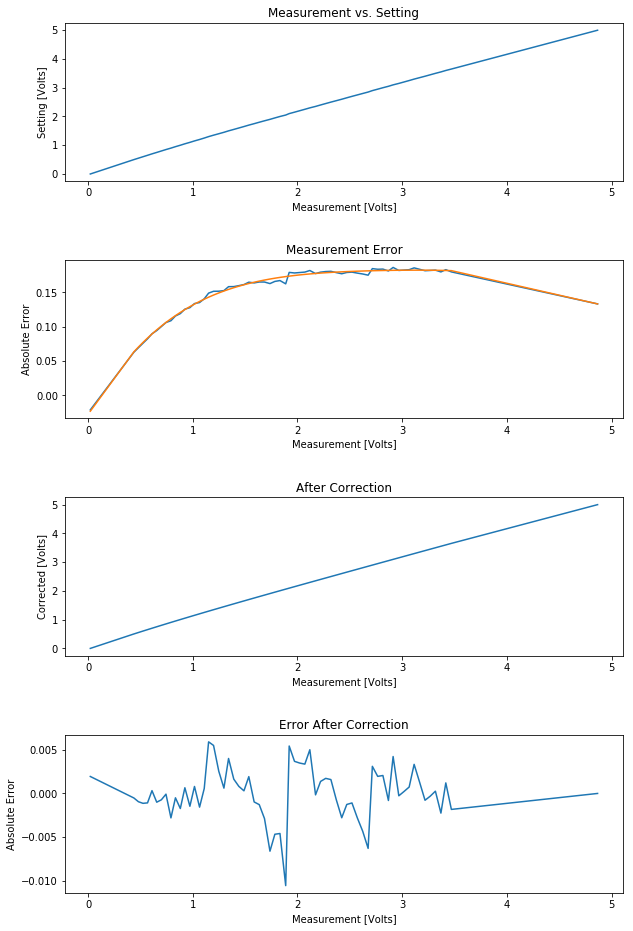

In [12]:
import matplotlib.pyplot as plt
#from scipy import stats
import numpy as np
#from scipy.optimize import curve_fit,least_squares

# numpyfy
setvolts = np.array(theory_volts)
adcvolts = np.array(adc_volts)

absolute_error = setvolts - adcvolts

errorpoly = np.polyfit(adcvolts, absolute_error, 4)
errorfunc = np.poly1d(errorpoly)

corrected = adcvolts + errorfunc(adcvolts)

corr_error = setvolts - corrected
#relative_error = corr_error / setvolts

plt.rcParams["figure.figsize"] = (10,16)
plt.figure()
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.subplot(411)
plt.plot(adcvolts,setvolts)
plt.xlabel('Measurement [Volts]')
plt.ylabel('Setting [Volts]')
plt.title('Measurement vs. Setting')
plt.subplot(412)
plt.plot(adcvolts, absolute_error)
plt.plot(adcvolts, errorfunc(adcvolts))
plt.xlabel('Measurement [Volts]')
plt.ylabel('Absolute Error')
plt.title('Measurement Error')
plt.subplot(413)
plt.xlabel('Measurement [Volts]')
plt.ylabel('Corrected [Volts]')
plt.title('After Correction')
plt.plot(adcvolts, corrected)
plt.subplot(414)
plt.xlabel('Measurement [Volts]')
plt.ylabel('Absolute Error')
plt.title('Error After Correction')
plt.plot(adcvolts, corr_error)
#plt.subplot(515)
#plt.xlabel('Measurement [Volts]')
#plt.ylabel('Relative Error')
#plt.title('Error After Correction ')
#plt.plot(adcvolts, relative_error)


In [13]:
errorfunc(2.12)+2.12

2.297003178271787

In [14]:
def volt(register):
    adcv=(xadc_max/xadc_resolution * power.read(register))
    return adcv+errorfunc(adcv)

In [15]:
volt(power_volt3v3)

3.3167475162313464

In [16]:
volt(power_volt5v)

5.000567759118074

In [17]:
volt(power_voltvar)

-0.007485173578101044